In [114]:
#  NumPy and Pandas imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot

#  Reading time series
from pandas_datareader import data

# Stationarity
import statsmodels.api as sm
import statsmodels.tsa as tsa

#  Time stamps
import datetime as datetime

#  Visualization (sns is a visualization library based on matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


In [79]:
#  Start and End Date
start = datetime.date(2016, 4, 10)
end = datetime.date(2019, 4, 10)

#  Assign a database with historical stock quotes from Yahoo! Finance to CSCO
#  Cisco Systems, Inc.
CSCO = data.get_data_yahoo('CSCO', start, end)
CSCO_closing_prices = pd.DataFrame()
CSCO_closing_prices['Adj Close'] = CSCO['Adj Close']
CSCO_closing_prices['Date'] = CSCO_closing_prices.index
CSCO_closing_prices.set_index('Date')
#CSCO_closing_prices['Date'] = CSCO_closing_prices.index
CSCO_percent_change = CSCO_closing_prices['Adj Close'].pct_change()

In [92]:
test = CSCO['Adj Close'].rolling(30).var()

# Stationarity
---------
Disaggregate a time series into three components -- trend, seasonal, residual

* trend component
    - supposed to capture the slowly-moving overall level of the series
* seasonal component
    - captures patterns that repeat every season
* Residual component
    - residual is what is left

Multiplicative model is better because of lack of consistent
seasonal trends

Stationarity Analysis: Differencing, Decomposition


First note that the data is clearly non-stationarity. This is 
A problem for time series analysis because non-stationarity data
is hard to reason about. 


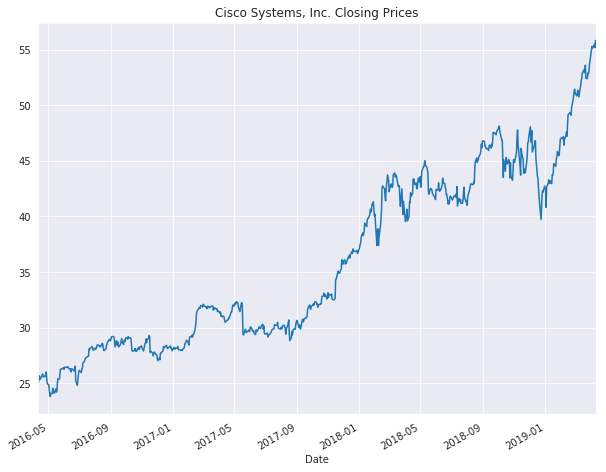

In [80]:
CSCO_closing_prices['Adj Close'].plot(title=
                                      "Cisco Systems, Inc. Closing Prices",
                                      figsize=(10, 8))

## Differencing
The basic idea is taking differences between successive occurrences of a time series
Δx<sub>t</sub> = x<sub>t</sub> - x<sub>t-1</sub> so that Δx<sub>t</sub> has a 
constant mean and variance (it can then be treated as stationary series)
##### First-Order differencing

In [81]:
CSCO_closing_prices['First Order'] = CSCO['Adj Close'] - CSCO['Adj Close'].shift()
CSCO_closing_prices.head()

,Adj Close,Date,First Order
Date,,,
2016-04-11,25.081974,2016-04-11,NaN
2016-04-12,25.100136,2016-04-12,0.018162
2016-04-13,25.635920,2016-04-13,0.535784
2016-04-14,25.654081,2016-04-14,0.018162
2016-04-15,25.336243,2016-04-15,-0.317839


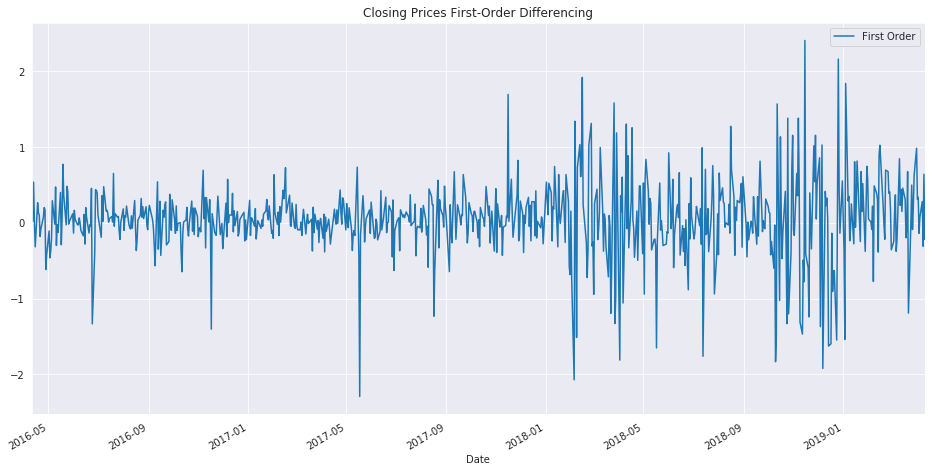

In [82]:
CSCO_closing_prices['First Order'].plot(legend=True,
                                        title="Closing Prices First-Order Differencing",
                                        figsize=(16, 8))

Data is no longer trending up, is now centered around zero. The variance is
a problem though. It increases over time, which is a sign the data is 
non-stationary and also exponentially increasing

Apply a transformation which penalizes higher values more than smaller values.
Using log transformations

Important property of Log-returns is that they're symmetrical around 0 with
respect to addition

This property makes it possible to talk about an average return
(if a stock goes down 20% over a period of time, it has to gain 25% to be back
where you started. For the log-return the numbers are .223 down over a period
of time and .233 up to get back to where you started)

Arithmetic returns allow easier cross-sectional aggregation, log returns allow
for easier time aggregation (grouping rows)

DataFrame .apply(func) method, "func" is the function to apply to each column
or row. 

lambda function: 
small anonymous function
Syntax ---- lambda *arguments* : *expression*

The lambda function takes 'Adj Close' values and applies a log transformation
to them. (log function is from NumPy package, NOT ON A NUMPY ARRAY)


This gives us the original closing price with a log transformation applied
to "flatten" the data from an exponential curve to a linear curve.


In [83]:
CSCO_closing_prices['Log Transform'] = CSCO['Adj Close'].apply(lambda x: np.log(x))
CSCO_closing_prices.head()

,Adj Close,Date,First Order,Log Transform
Date,,,,
2016-04-11,25.081974,2016-04-11,NaN,3.222149
2016-04-12,25.100136,2016-04-12,0.018162,3.222873
2016-04-13,25.635920,2016-04-13,0.535784,3.243994
2016-04-14,25.654081,2016-04-14,0.018162,3.244703
2016-04-15,25.336243,2016-04-15,-0.317839,3.232236


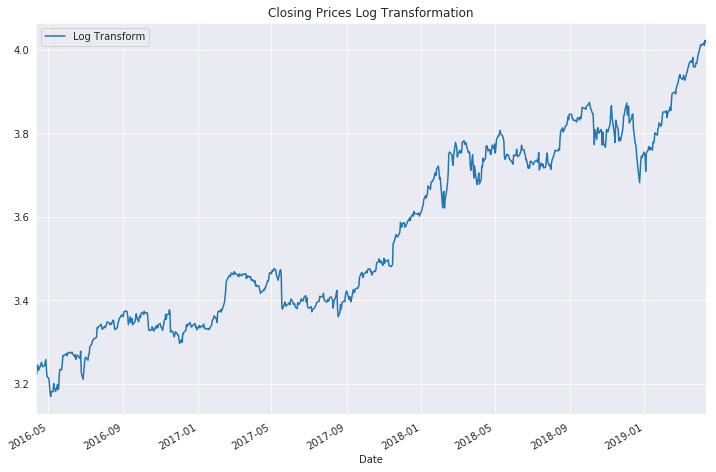

In [84]:
CSCO_closing_prices['Log Transform'].plot(legend=True,
                                        title="Closing Prices Log Transformation",
                                        figsize=(12, 8))

Check the effect with pandas **.rolling_var()** function, variance measures
the distance from the mean. 

We can see in the bottom graph that the log transformation has made the 
variance more constant

In [96]:
#  calculate rolling variance of original closing prices

CSCO_closing_prices['Variance'] = CSCO['Adj Close'].rolling(window=30, 
                                               min_periods=None, 
                                               center=True).var()

#   calculate rolling variance of log transformed closing prices
CSCO_closing_prices['Log Variance'] = \
    CSCO_closing_prices['Log Transform'].rolling(30, center=True).var()

,Adj Close,Date,First Order,Log Transform,Variance,Log Variance
Date,,,,,,
2019-03-18,53.173336,2019-03-18,0.308048,3.973557,2.111313,0.000756
2019-03-19,52.974598,2019-03-19,-0.198738,3.969813,2.236937,0.000796
2019-03-20,52.924908,2019-03-20,-0.049690,3.968874,2.310253,0.000820
2019-03-21,53.600632,2019-03-21,0.675724,3.981561,2.505546,0.000885
2019-03-22,52.408184,2019-03-22,-1.192448,3.959063,2.636236,0.000929


In [ ]:
#  Display DataFrame
CSCO_closing_prices.dropna().head()

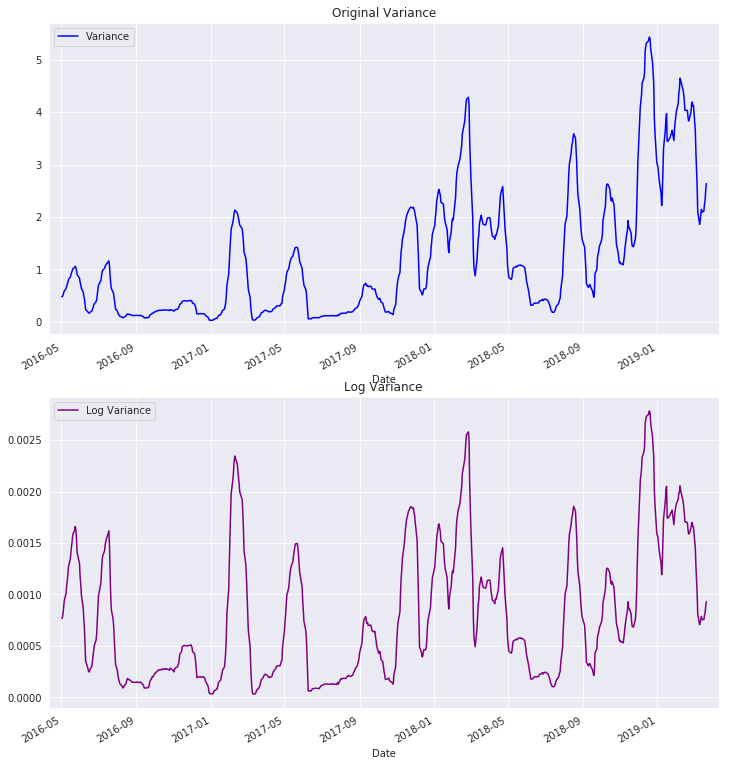

In [102]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))
#  Plot the rolling variance for original closing prices
CSCO_closing_prices['Variance'].plot(ax=ax[0],
                                     legend=True,
                                     title='Original Variance',
                                     color='blue')
#  Plot the rolling variance for log transformed closing prices
CSCO_closing_prices['Log Variance'].plot(ax=ax[1],
                                         legend=True,
                                         title='Log Variance',
                                         color='purple')

Calculate the logged first order difference

In [103]:
#  Get first order difference
CSCO_closing_prices['Logged First Order'] = CSCO_closing_prices['Log Transform'].diff()
#  Display data
CSCO_closing_prices.dropna().head()

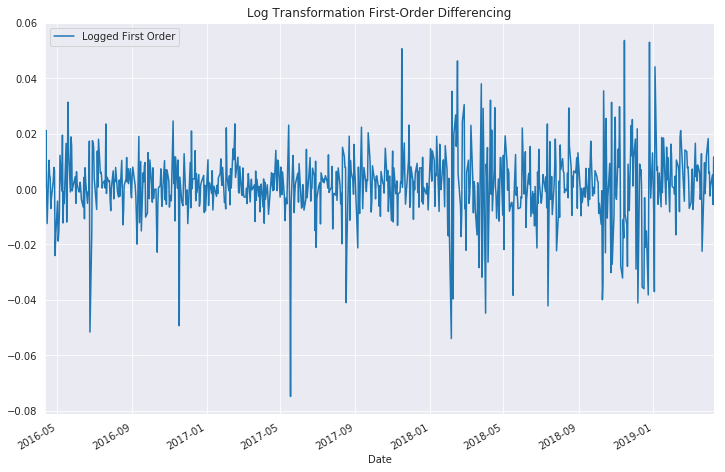

In [104]:
CSCO_closing_prices['Logged First Order'].plot(legend=True,
                                        title="Log Transformation First-Order Differencing",
                                        figsize=(12, 8))

First-order differences should be independent and identically distributed with a constant
mean and variance, which means no autocorrelation.

Check this with lag variables x<sub>t-1</sub>, x<sub>t-2</sub>, etc.. and compare
them to x<sub>t</sub>

Check the bivariate relationship for a mass around zero and the univariate distributions
as evenly distributed.

In [106]:
#  Create lag attributes for 5 days and 20 days
CSCO_closing_prices['Log Difference Lag 5'] = CSCO_closing_prices['Logged First Order'].shift(5)
CSCO_closing_prices['Log Difference Lag 20'] = CSCO_closing_prices['Logged First Order'].shift(20)

/home/trevor/anaconda3/envs/CS4315/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


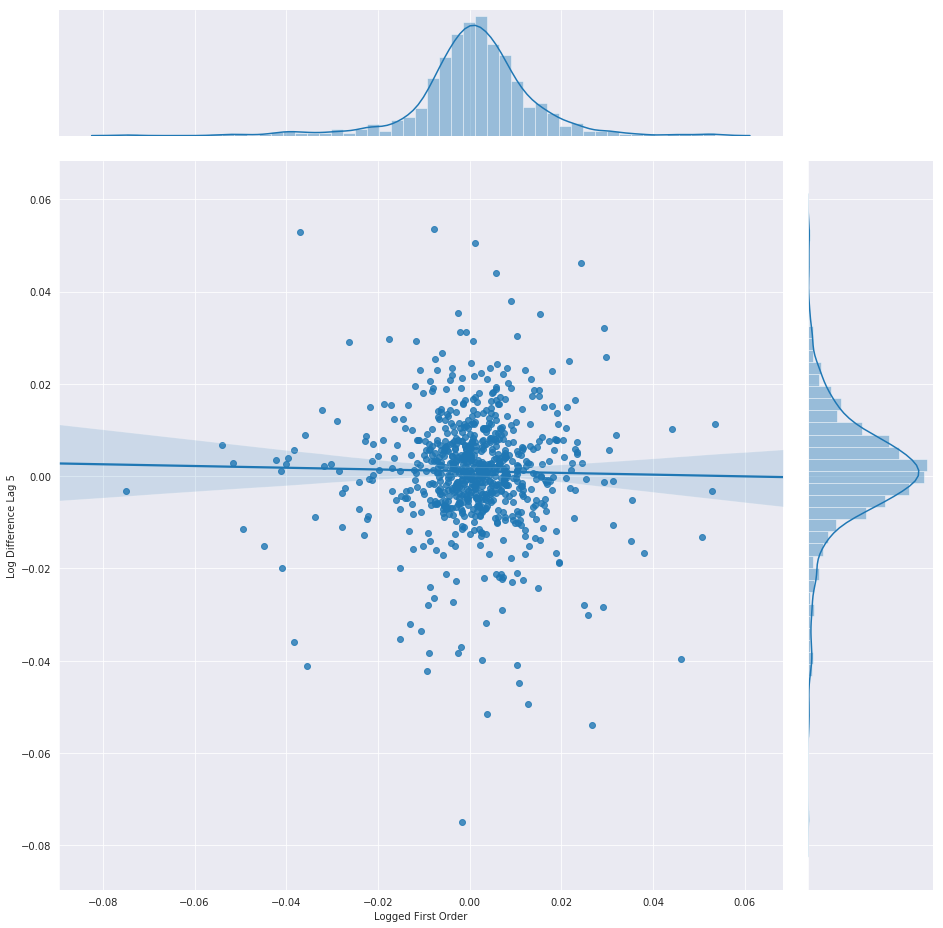

In [107]:
#  Check distribution in scatter plot of original attribute vs lagged attribute
sns.jointplot('Logged First Order', 'Log Difference Lag 5', CSCO_closing_prices, kind='reg', size=13)

/home/trevor/anaconda3/envs/CS4315/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


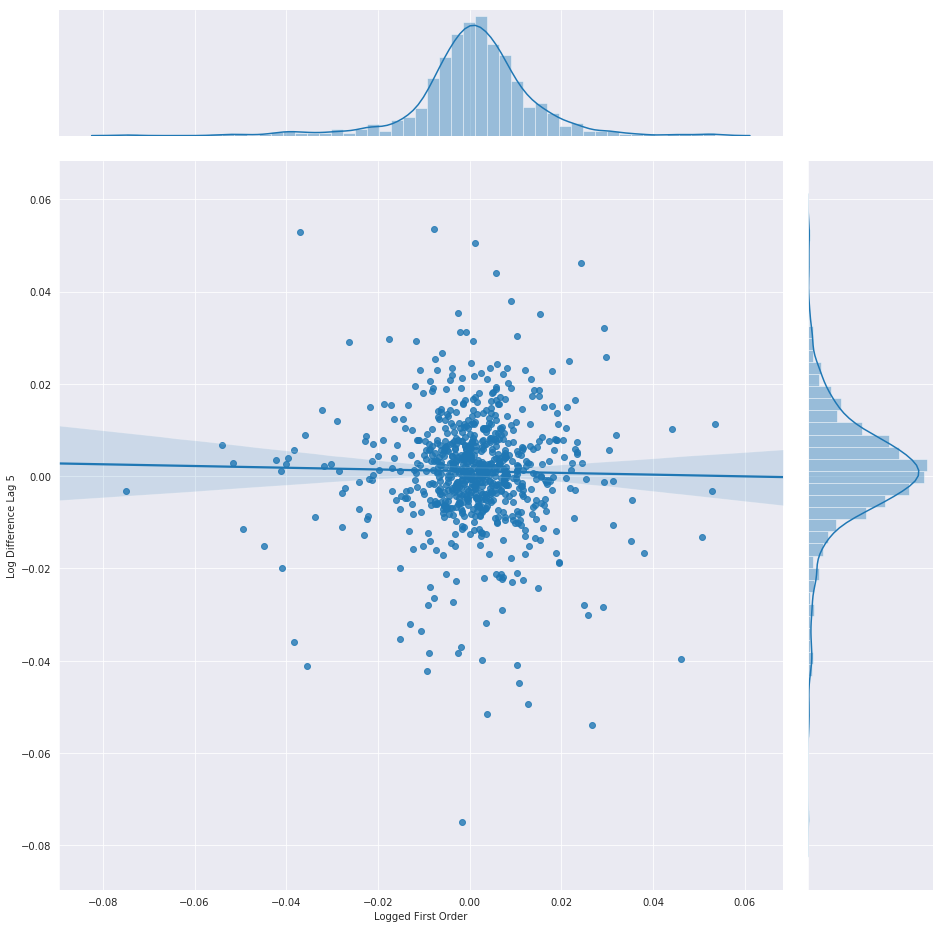

In [108]:
sns.jointplot('Logged First Order', 'Log Difference Lag 5', CSCO_closing_prices, kind='reg', size=13)


Verify if first-order differencing standardized the time series with an
**autocorrelation function (ACF)** The ACF computes the correlation between a variable
and itself at each lag step up to the set limit 40.

In [110]:
log_acf = sm.tsa.acf(CSCO_closing_prices['Logged First Order'].dropna())

AttributeError: 'numpy.ndarray' object has no attribute 'plt'

Plotting the ACF shows the correlation between a value at time t
and any time prior to t (up to 40 days behind). This time series model
is known as a **Random Walk**

A random walk is different than a list of rand numbers since the next value
in the sequence is a modification of the previous value in the sequence.
Generating the series forces a dependence from one time point to the next. This
dependence provides consistency that large jumps in an independent series doesnt.
The dependency gives the time series the name "random walk"

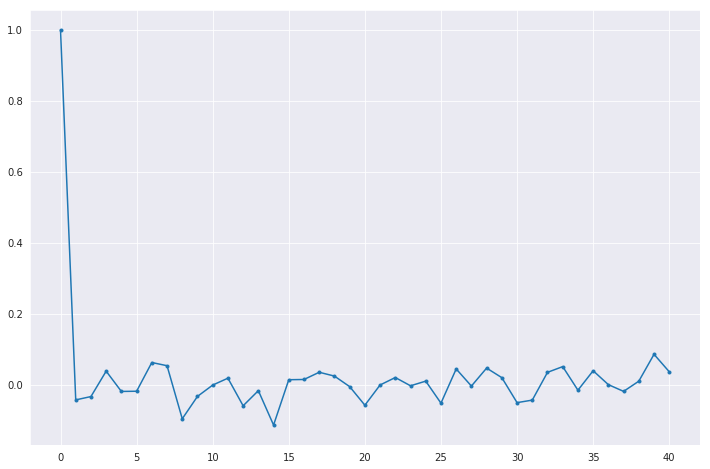

In [118]:
#  Plot the Autocorrelation Function with Statsmodels package
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(log_acf, marker='.')

Plotting with pandas **autocorrelation_plot()** also visualizes the randomness
of a function. The horizontal dashed lines correspond to the 99% confidence band.
If a time series is random, then none of the autocorrelations will be significantly 
non-zero. As we can see here, the log transformation is still a random series.

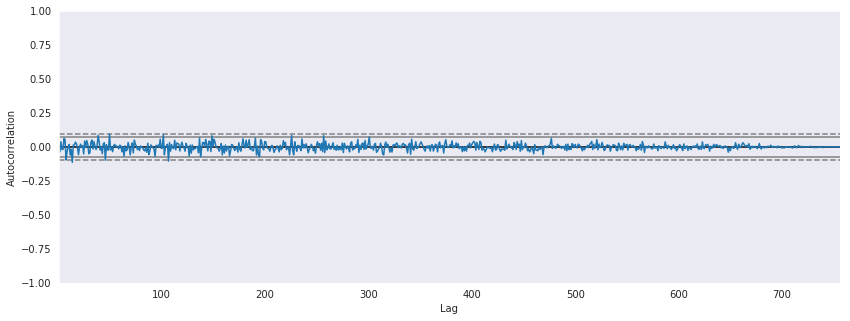

In [121]:
#  Plot Autocorrelation Function with pandas "autocorrelation_plot()" function
plt.figure(figsize=(14, 5))
autocorrelation_plot(CSCO_closing_prices['Logged First Order'].dropna())

The stats model package seasonal_decompose() function is used to decompose the time
series into trend, seasonality, and residual components.

This shows us that trend is going up and seasonality is following a regular pattern.

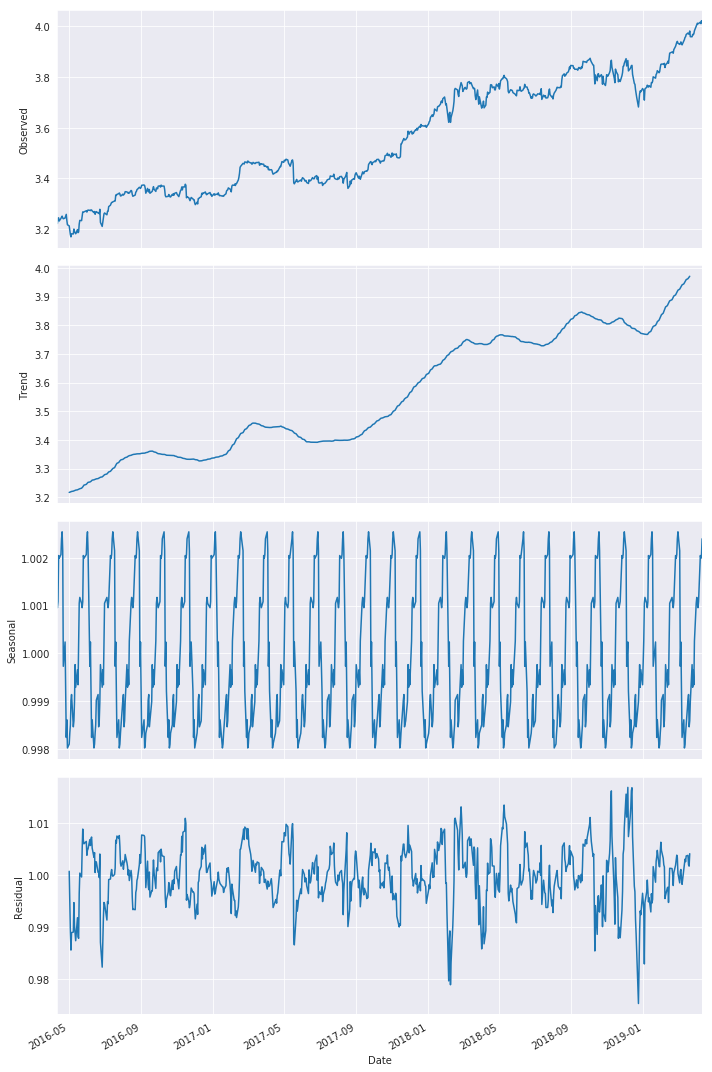

In [135]:
decompose_data = sm.tsa.seasonal_decompose(CSCO_closing_prices['Log Transform'], 
                                           model="multiplicative", 
                                           freq=30)
figures = decompose_data.plot()
plt.rcParams['figure.figsize'] = [10.0, 12.0]

### Smoothing


